# Lehká analýza

1. Celkový pohled na data, víc filtrování 
2. Základní statistiky: min, max, mean, median, standard deviation, korelace
3. statistické testy: test normality
4. lineární regrese

In [24]:
import pandas as pd

In [25]:
pokemon_df = pd.read_csv("data/Pokemon.csv")

## Základní údaje o datech

In [26]:
pokemon_df.shape

(807, 21)

In [4]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 21 columns):
id                        807 non-null int64
name                      807 non-null object
height                    807 non-null float64
weight                    807 non-null float64
color                     807 non-null object
shape                     807 non-null object
is baby                   807 non-null bool
type 1                    807 non-null object
type 2                    405 non-null object
hp                        807 non-null int64
attack                    807 non-null int64
defense                   807 non-null int64
sp. attack                807 non-null int64
sp. defense               807 non-null int64
speed                     807 non-null int64
total                     807 non-null int64
generation                807 non-null int64
evolves from              387 non-null float64
evolution group           807 non-null int64
fm gender ratio           807 

In [27]:
pokemon_df.count()

id                        807
name                      807
height                    807
weight                    807
color                     807
shape                     807
is baby                   807
type 1                    807
type 2                    405
hp                        807
attack                    807
defense                   807
sp. attack                807
sp. defense               807
speed                     807
total                     807
generation                807
evolves from              387
evolution group           807
fm gender ratio           807
has_gender_differences    807
dtype: int64

In [37]:
pokemon_df.describe().loc["min" : "max"]

,id,height,weight,hp,attack,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,has_gender_differences
min,1.0,0.1,0.1,1.0,5.0,5.0,10.0,20.0,5.0,175.0,1.0,1.0,1.0,0.0
25%,202.5,0.6,9.0,50.0,55.0,50.0,45.0,50.0,45.0,321.5,2.0,158.5,86.5,0.0
50%,404.0,1.0,27.0,65.0,75.0,67.0,65.0,65.0,65.0,431.0,4.0,353.0,192.0,0.0
75%,605.5,1.5,63.0,80.0,95.0,89.0,90.0,85.0,85.0,500.0,5.0,574.5,306.5,0.0
max,807.0,14.5,999.9,255.0,181.0,230.0,173.0,230.0,160.0,720.0,7.0,803.0,427.0,1.0


In [35]:
pokemon_df.iloc[pokemon_df["weight"].idxmax()]

id                            790
name                      cosmoem
height                        0.1
weight                      999.9
color                        blue
shape                        ball
is baby                     False
type 1                    Psychic
type 2                        NaN
hp                             43
attack                         29
defense                       131
sp. attack                     29
sp. defense                   131
speed                          37
total                         400
generation                      7
evolves from                  789
evolution group               413
fm gender ratio               0:0
has_gender_differences          0
Name: 789, dtype: object

In [8]:
pokemon_df.sort_values(by="weight", ascending=False).head()

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
796,797,celesteela,9.2,999.9,green,humanoid,False,Steel,Flying,97,...,103,107,101,61,570,7,NaN,418,0:0,0
789,790,cosmoem,0.1,999.9,blue,ball,False,Psychic,NaN,43,...,131,29,131,37,400,7,789.0,413,0:0,0
382,383,groudon,3.5,950.0,red,upright,False,Ground,NaN,100,...,140,100,90,90,670,3,NaN,199,0:0,0
749,750,mudsdale,2.5,920.0,brown,quadruped,False,Ground,NaN,100,...,100,55,85,35,500,7,749.0,386,1:1,0
798,799,guzzlord,5.5,888.0,black,upright,False,Dark,Dragon,223,...,53,97,53,43,570,7,NaN,420,0:0,0


In [9]:
pokemon_df["weight"].mean()

61.771127633209424

In [10]:
pokemon_df["weight"].median()

27.0

In [11]:
pokemon_df["weight"].mode()

0    5.0
dtype: float64

In [12]:
pokemon_df

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
0,1,bulbasaur,0.7,6.9,green,quadruped,False,Grass,Poison,45,...,49,65,65,45,318,1,NaN,1,1:7,0
1,2,ivysaur,1.0,13.0,green,quadruped,False,Grass,Poison,60,...,63,80,80,60,405,1,1.0,1,1:7,0
2,3,venusaur,2.0,100.0,green,quadruped,False,Grass,Poison,80,...,83,100,100,80,525,1,2.0,1,1:7,1
3,4,charmander,0.6,8.5,red,upright,False,Fire,NaN,39,...,43,60,50,65,309,1,NaN,2,1:7,0
4,5,charmeleon,1.1,19.0,red,upright,False,Fire,NaN,58,...,58,80,65,80,405,1,4.0,2,1:7,0
5,6,charizard,1.7,90.5,red,upright,False,Fire,Flying,78,...,78,109,85,100,534,1,5.0,2,1:7,0
6,7,squirtle,0.5,9.0,blue,upright,False,Water,NaN,44,...,65,50,64,43,314,1,NaN,3,1:7,0
7,8,wartortle,1.0,22.5,blue,upright,False,Water,NaN,59,...,80,65,80,58,405,1,7.0,3,1:7,0
8,9,blastoise,1.6,85.5,blue,upright,False,Water,NaN,79,...,100,85,105,78,530,1,8.0,3,1:7,0
9,10,caterpie,0.3,2.9,green,armor,False,Bug,NaN,45,...,35,20,20,45,195,1,NaN,4,1:1,0


In [13]:
pokemon_df.drop(columns=["id"]).groupby("shape").describe()

height                                                    weight  \
           count      mean       std  min    25%   50%    75%   max  count   
shape                                                                        
armor       38.0  0.736842  0.529876  0.1  0.325  0.55  1.075   2.5   38.0   
arms        45.0  0.960000  0.561815  0.1  0.500  0.90  1.300   2.4   45.0   
ball        37.0  0.624324  0.402358  0.1  0.300  0.50  0.900   1.5   37.0   
blob        33.0  1.006061  0.725405  0.2  0.500  1.00  1.300   3.9   33.0   
bug-wings   19.0  1.200000  0.414997  0.2  1.000  1.20  1.500   1.9   19.0   
fish        36.0  1.452778  2.376851  0.2  0.600  0.90  1.225  14.5   36.0   
heads       15.0  0.826667  0.438287  0.3  0.450  0.70  1.250   1.6   15.0   
humanoid   124.0  1.139516  0.933985  0.2  0.600  1.00  1.500   9.2  124.0   
legs        19.0  0.684211  0.510189  0.2  0.400  0.50  0.700   2.0   19.0   
quadruped  151.0  1.145033  0.816390  0.2  0.600  1.00  1.500   5.5  151.0   
squiggle    32.0  2.496875  2.537650  0.2  0.700  1.50  3.350   9.2   32.0   
tentacles   18.0  1.355556  0.964196  0.4  0.900  1.10  1.575   4.5   18.0   
upright    168.0  1.186310  0.748646  0.2  0.600  1.00  1.500   5.5  168.0   
wings       72.0  1.281944  1.076160  0.2  0.575  1.10  1.525   5.8   72.0   

                       ... evolution group        has_gender_differences  \
                 mean  ...             75%    max                  count   
shape                  ...                                                 
armor       30.897368  ...          317.25  387.0                   38.0   
arms        40.413333  ...          344.00  421.0                   45.0   
ball        64.237838  ...          304.00  413.0                   37.0   
blob        38.109091  ...          349.00  407.0                   33.0   
bug-wings   34.431579  ...          210.50  382.0                   19.0   
fish        55.925000  ...          303.00  405.0                   36.0   
heads       89.740000  ...          305.00  353.0                   15.0   
humanoid    62.096774  ...          290.75  427.0                  124.0   
legs        23.194737  ...          179.50  392.0                   19.0   
quadruped   81.317881  ...          297.50  425.0                  151.0   
squiggle    85.812500  ...          362.00  406.0                   32.0   
tentacles  115.477778  ...          361.00  415.0                   18.0   
upright     64.836905  ...          285.00  424.0                  168.0   
wings       42.662500  ...          319.25  424.0                   72.0   

                                                        
               mean       std  min  25%  50%  75%  max  
shape                                                   
armor      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
arms       0.044444  0.208409  0.0  0.0  0.0  0.0  1.0  
ball       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
blob       0.030303  0.174078  0.0  0.0  0.0  0.0  1.0  
bug-wings  0.315789  0.477567  0.0  0.0  0.0  1.0  1.0  
fish       0.166667  0.377964  0.0  0.0  0.0  0.0  1.0  
heads      0.066667  0.258199  0.0  0.0  0.0  0.0  1.0  
humanoid   0.153226  0.361666  0.0  0.0  0.0  0.0  1.0  
legs       0.210526  0.418854  0.0  0.0  0.0  0.0  1.0  
quadruped  0.152318  0.360525  0.0  0.0  0.0  0.0  1.0  
squiggle   0.093750  0.296145  0.0  0.0  0.0  0.0  1.0  
tentacles  0.166667  0.383482  0.0  0.0  0.0  0.0  1.0  
upright    0.113095  0.317656  0.0  0.0  0.0  0.0  1.0  
wings      0.152778  0.362298  0.0  0.0  0.0  0.0  1.0  

[14 rows x 104 columns]

## Statistické testy

In [14]:
import scipy.stats as st

In [15]:
# Import visualization tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!

Test normality

In [16]:
st.normaltest(pokemon_df["weight"])

NormaltestResult(statistic=820.8751735153749, pvalue=5.6133342769384294e-179)

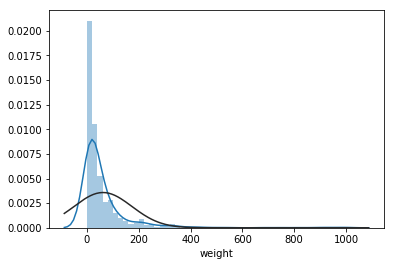

In [17]:
sns.distplot(pokemon_df["weight"], fit=st.norm)

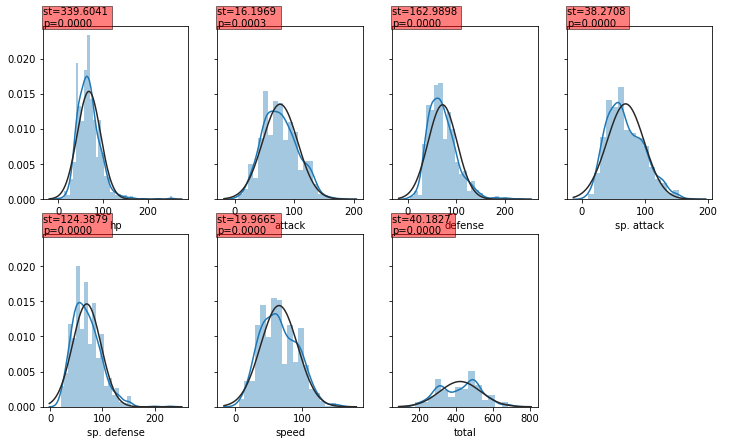

In [23]:
fig, axs = plt.subplots(ncols=len(pokemon_df.loc[:, "hp" : "total"].columns)//2 + 1, nrows=2, figsize=(12, 7), sharey=True)
for col, ax in zip(pokemon_df.loc[:, "hp" : "total"].columns, axs.flatten()):
    ntest = st.normaltest(pokemon_df[col])
    sns.distplot(pokemon_df[col], fit=st.norm, ax=ax)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1], "st=%.4f \np=%.4f" % ntest, 
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':1}if ntest.pvalue < .005 else None)
axs[-1, -1].axis("off");

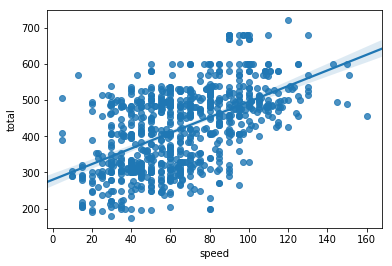

In [38]:
sns.regplot(x="speed", y="total", data=pokemon_df)

In [40]:
st.kruskal(pokemon_df[pokemon_df["shape"] == "quadruped"]["speed"], 
           pokemon_df[pokemon_df["shape"] == "upright"]["speed"])

KruskalResult(statistic=0.13407487384731367, pvalue=0.7142439271109309)

In [39]:
pokemon_df.head()

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
0,1,bulbasaur,0.7,6.9,green,quadruped,False,Grass,Poison,45,...,49,65,65,45,318,1,NaN,1,1:7,0
1,2,ivysaur,1.0,13.0,green,quadruped,False,Grass,Poison,60,...,63,80,80,60,405,1,1.0,1,1:7,0
2,3,venusaur,2.0,100.0,green,quadruped,False,Grass,Poison,80,...,83,100,100,80,525,1,2.0,1,1:7,1
3,4,charmander,0.6,8.5,red,upright,False,Fire,NaN,39,...,43,60,50,65,309,1,NaN,2,1:7,0
4,5,charmeleon,1.1,19.0,red,upright,False,Fire,NaN,58,...,58,80,65,80,405,1,4.0,2,1:7,0
